self_w0 = 0.1, self_w1 = 0.1


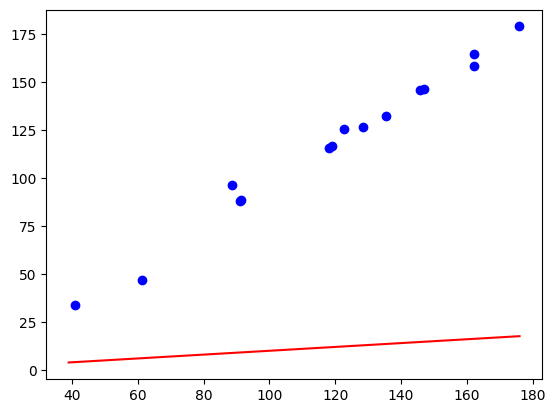

OLD: w0 = 0.1,  w1 = 0.1
NEW: w0 = 0.100422728,  w1 = 0.15578219893333334
erro = 8.863818854993777
erro = 12.099980025853764
erro = 14.61716436324541
erro = 15.426018733134962
erro = 16.20322605988996
erro = 17.109134643913325
erro = 17.206184587816185
erro = 17.38456460834688
erro = 20.10646930217519
erro = 21.319251725773572
erro = 22.470703984381853
erro = 23.38855118856925
erro = 24.532320445210555
erro = 25.39145443459688
erro = 27.042292229441625
OLD: w0 = 0.100422728,  w1 = 0.15578219893333334
NEW: w0 = 0.10081883206870641,  w1 = 0.20807903723213556
erro = 8.298637948840142
erro = 11.337070926128822
erro = 13.70023730931009
erro = 14.455777365323096
erro = 15.182008476532454
erro = 16.04272464968791
erro = 16.13072477554952
erro = 16.289701446176437
erro = 18.8517038317619
erro = 19.99375041068312
erro = 21.071764106180055
erro = 21.93038444366309
erro = 22.999565964541183
erro = 23.803634410707545
erro = 25.356720426370277
OLD: w0 = 0.10081883206870641,  w1 = 0.2080790372321355

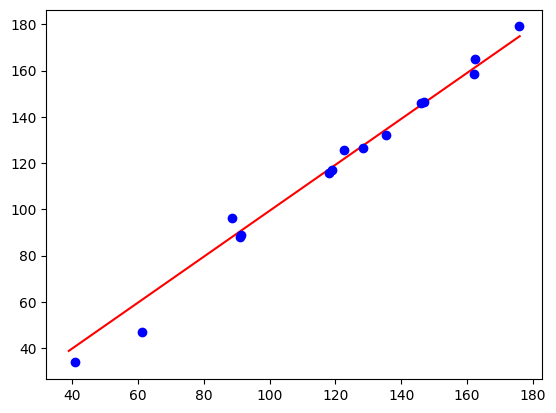

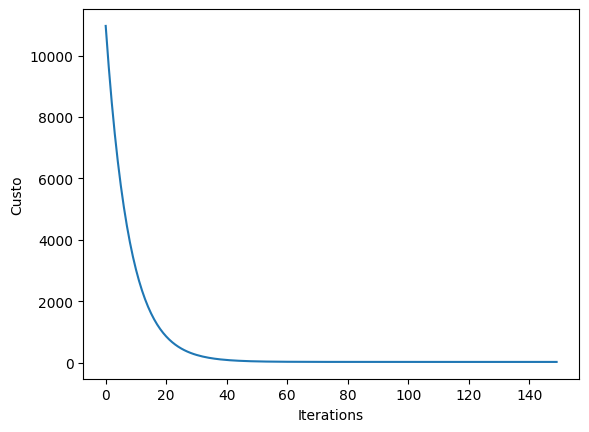

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

#X = [0.5, 2.2, 2.0, 3.7, 8.1, 9.4, 10.4, 11.2, 15.3, 19.1, 27.7] #Esse é o x dos meus dados
#y = [2.0, 2.5, 1.4, 4.1, 5.3, 7.4, 12.4, 13.2, 13.6, 20.5, 10.7] #Esse é o y dos meus dados

#X = [21.7, 34.1, 33.2, 98.2, 94.7, 86.5, 148.1, 136.0, 0.8, 58.6, 52.1, 70.3, 55.0, 70.9, 15.7]
#y = [162.1, 147.0, 145.9, 91.0, 91.4, 88.7, 40.8, 61.3, 175.9, 122.6, 128.3, 118.0,135.5, 118.9, 162.3]

X = [162.1, 147, 145.9, 91, 91.4, 88.7, 40.8, 61.3, 175.9, 122.6, 128.3, 118, 135.5, 118.9, 162.3]
y = [158.31, 146.55, 145.84, 88.22, 88.71, 96.32, 33.83, 46.91, 179.03, 125.52, 126.6, 115.8, 132.26, 116.86, 164.94]
class erro_custo_graddesc():
    def __init__(self, w0 = 170, w1 = 0.1):
        self.w0 = w0
        self.w1 = w1
        
    #hipótese (reta) y_reta = w1*X + w0
    def y_reta(x, w0, w1):
        return w1*x + w0
    
    def teste_predi(self):
        print(erro_custo_graddesc.y_reta(1.2, self.w0, self.w1))
    
    
    def plot_graph(self, X, y):
        print('self_w0 = {}, self_w1 = {}'.format(self.w0, self.w1))
        x_values = [i for i in range(int(min(X)) - 1, int(max(X)) + 2)]
        y_values = [erro_custo_graddesc.y_reta(x, w0=self.w0, w1=self.w1) for x in x_values]
        plt.plot(x_values, y_values, 'r')
        plt.plot(X,y,'bo')
        plt.show()
    
    def erro_custo(self, X, y):
        #lembrando que o custo é dado por
        # J = 1/n SUM (y_reta - y_dados)**2 
        #y_reta = erro_custo_graddesc.y_reta(X[i], self.w0, self.w1) 
        custo = 0
        n = len(X)
        for i in range(0, n):
            #custo += sqrt((erro_custo_graddesc.y_reta(X[i], self.w0, self.w1) - y[i]) ** 2)
            custo += (erro_custo_graddesc.y_reta(X[i], self.w0, self.w1) - y[i]) ** 2
            print('erro = {}'.format(sqrt(custo)/n))
        
        return custo/float(n)
    
    def gradient_desc_w0w1(self,X, y, alpha = 0.01):
        #os valores de w0 e w1 com gradiente descendente é dado por        
        #w0 = w0 - alpha * 1/n SUM (erro)
        #w1 = w1 - alpha * 1/n SUM (erro) * X[i]
        #calculamos primeiro a parte do somatorio (erro)
        #erro = (y_reta - y_dados)
        #y_reta = erro_custo_graddesc.y_reta(X[i], self.wo, self.w1)
        erro_w0 = 0
        erro_w1 = 0
        n = len(X)
        
        for i in range(0, n): #essa aqui é só a parte de calcular o somatório
            erro_w0 += erro_custo_graddesc.y_reta(X[i], self.w0, self.w1) - y[i]
            erro_w1 += (erro_custo_graddesc.y_reta(X[i], self.w0, self.w1) - y[i]) * X[i]
            
        
        #Calculando os novos w0 e w1
        new_w0 = self.w0 - alpha * (1/float(n)) * erro_w0
        new_w1 = self.w1 - alpha * (1/float(n)) * erro_w1
        
        print('OLD: w0 = {},  w1 = {}'.format(self.w0, self.w1))
        self.w0 = new_w0
        self.w1 = new_w1
        print('NEW: w0 = {},  w1 = {}'.format(self.w0, self.w1))
        
        
    
    def grad_fit(self, X, y, alpha = 0.01, iterations = 10):
        custo = np.zeros(iterations) #isso aqui é semelhante a uma lista vazia, pra fazer append dentro do for, dessa forma fica mais rápido
        for j in range(iterations):
            erro_custo_graddesc.gradient_desc_w0w1(self, X, y, alpha=alpha) #chamo a função que calcula o old e new w0 w1 e vou iterando, assim vai ajustando a reta com os pontos dos dados
            custo[j] = erro_custo_graddesc.erro_custo(self, X,y) #apende nivel C
        
        return self.w0, self.w1, custo, iterations
    
    def plot_custoXiterations(self, custo, iterations):
        x_iterations = [xx for xx in range(0, iterations)]
        plt.xlabel('Iterations')
        plt.ylabel('Custo')
        plt.plot(x_iterations, custo)
        plt.show()        
        
    def predict(self, x_pred):
        pred = erro_custo_graddesc.y_reta(x_pred, self.w0, self.w1)
        print('predição = {}'.format(pred))
        
if __name__ == '__main__':
    ecg = erro_custo_graddesc(w0 = 0.1, w1 = 0.1)
    #ecg.teste_predi()
    ecg.plot_graph(X,y) #plota o grafico antes de iterar
    #custo = ecg.erro_custo(X,y)
    #ecg.gradient_desc_w0w1(X, y)
    w0, w1, custo, iterations = ecg.grad_fit(X, y, iterations = 150,alpha=0.000004) #iterações testar as coisas antes e depois dessa linha
    ecg.plot_graph(X, y) #plota o grafico da comparação depois de iterar
    ecg.plot_custoXiterations(custo, iterations) #plotar o custo x iterações
    #ecg.predict(3) #predição
    